# Generate samples for a single scene

In [29]:
import sys
import os
from importlib import reload
import numpy as np

sys.path.insert(0, '../src')
import deepgeo.dataset.data_augment as dtaug
import deepgeo.dataset.rasterizer as rstzr
import deepgeo.dataset.preprocessor as prep
import deepgeo.dataset.dataset_generator as ds_gen
import deepgeo.common.visualization as vis
import dataset.random_chips as rdmchips
import dataset.sequential_chips as seqchips

reload(dtaug)
reload(rstzr)
reload(prep)
reload(ds_gen)

%matplotlib inline

In [30]:
# Input Files
DATA_DIR = os.path.join(os.path.abspath(os.path.dirname("__file__")), '../', 'data_real')
shape_file = os.path.join(DATA_DIR, 'PRODES2016_225-64_REP.shp')
raster_file = os.path.join(DATA_DIR, "Landsat8_225064_17072016_R6G5B4_clip.tif")
# class_column = "agregClass"
class_column = 'class_name'
classes_of_interest = ['DESMATAMENTO']
# class_column = "bin_class"
non_class = 'not_deforestation'

# Output Files
output_path = os.path.join(DATA_DIR, 'generated')
# fs.mkdir(output_path)
output_shp = os.path.join(output_path, "samples.shp")
output_npz = os.path.join(output_path, "samples_dataset_bin.npz")

number_of_samples = 500
window_size = 128

## Rasterize the input shape file

In [31]:
rasterizer = rstzr.Rasterizer(shape_file,
                              raster_file,
                              class_column,
                              classes_interest=classes_of_interest,
                              non_class_name=non_class)
rasterizer.collect_class_names()
rasterizer.rasterize_layer()
class_names = rasterizer.get_class_names()
rasterized_layer = rasterizer.get_labeled_raster()

Raster Shape: (6166, 6711, 1)
unique:  [1 2 --]


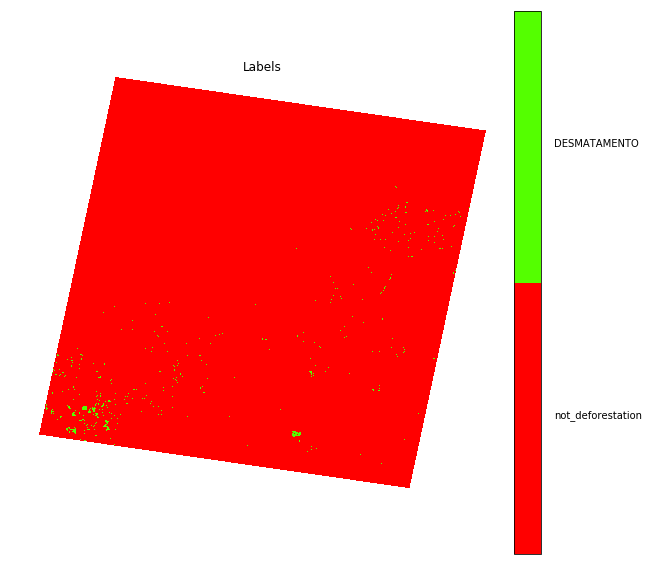

In [32]:
print("Raster Shape:", rasterized_layer.shape)
print('unique: ', np.unique(rasterized_layer))
vis.plot_labels(rasterized_layer, class_names)#, colors=["green", "red"])

In [ ]:
preproc = prep.Preprocessor(raster_file, no_data=-9999)
preproc.set_nodata_value(-10)
original_raster = preproc.get_raster_stacked_raster()
print("SHAPE: ", original_raster.shape)
# print("UNIQUE: ", np.unique(original_raster))

vis.plot_image_histogram(original_raster, cmap=["green", "red", "cyan", "blue", "yellow"],
                         title="Original Raster", legend=["Green", "Red", "NIR", "SWIR 1", "SWIR 2"])
vis.plot_rgb_img(original_raster, bands=[2,1,0], contrast=True)

In [ ]:
preproc.standardize_image()
raster_img = preproc.get_raster_stacked_raster()
# print(np.unique(raster_img))
vis.plot_image_histogram(raster_img, cmap=["green", "red", "cyan", "blue", "yellow"],
                         title="Standardized Raster", legend=["Green", "Red", "NIR", "SWIR 1", "SWIR 2"])

In [ ]:
# reload(seqchips)
params = {'raster_array': raster_img,
          'labels_array': rasterized_layer,
          'win_size': 128} #,
#           'perc_discard_nd': 0.8}

chips_seq = seqchips.SequentialChipGenerator(params).generate_chips()

In [ ]:
# reload(rdmchips)
# params = {'raster_array': raster_img,
#           'labels_array': rasterized_layer,
#           'win_size': 128,
#           'quantity': 1000}
# chips_rdm = rdmchips.RandomChipGenerator(params).generate_chips()

In [ ]:
# chpGen = ds_gen.DatasetGenerator(raster_img, rasterized_layer, class_names)
# chpGen.generate_chips()
# samples = chpGen.get_samples()
# print("Generated ", len(samples["images"]), " image samples.")
# print("Generated ", len(samples["labels"]), " label samples.")
# chpGen.save_samples_SHP(output_shp)
# chpGen.save_samples_NPZ(output_npz)

In [ ]:
reload(vis)
vis.plot_chips(chips_seq, raster_img, bands=[2, 1, 0], contrast=False)

In [ ]:
# vis.plot_vector_file(output_shp)